# Case study on Unsupervised Learning

***Do the following in the wine dataset.***
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model withthe optimum number of clusters.

In [1]:
# Importing Pandas Library as 'pd'
import pandas as pd
# Importing NumPy Library as 'np'
import numpy as np
# Importing Matplot's Sub Library PyPlot as 'plt'
import matplotlib.pyplot as plt
# Importing seaborn Library as 'sns'
import seaborn as sns

#### 1. Read the dataset to the python environment.

In [2]:
# Getting data from Local CSV File and copying into data_df Datafram
data_df=pd.read_csv('Wine.csv')
# Getting data of dataframe data_df
data_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##### Check for the null values present in the dataset

In [3]:
#To knowing the sum of null value is pandas dataframe
data_df.isnull().sum().to_frame('Null value count')

,Null value count
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


> ***Insights:-***
    * No null values found.

In [4]:
# To know the shape of the dataset
data_df.shape

(178, 13)

> ***Insights:-***
   * Here ***178 records and 13*** features available in the dataset.

In [5]:
data_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Checking for outliers:

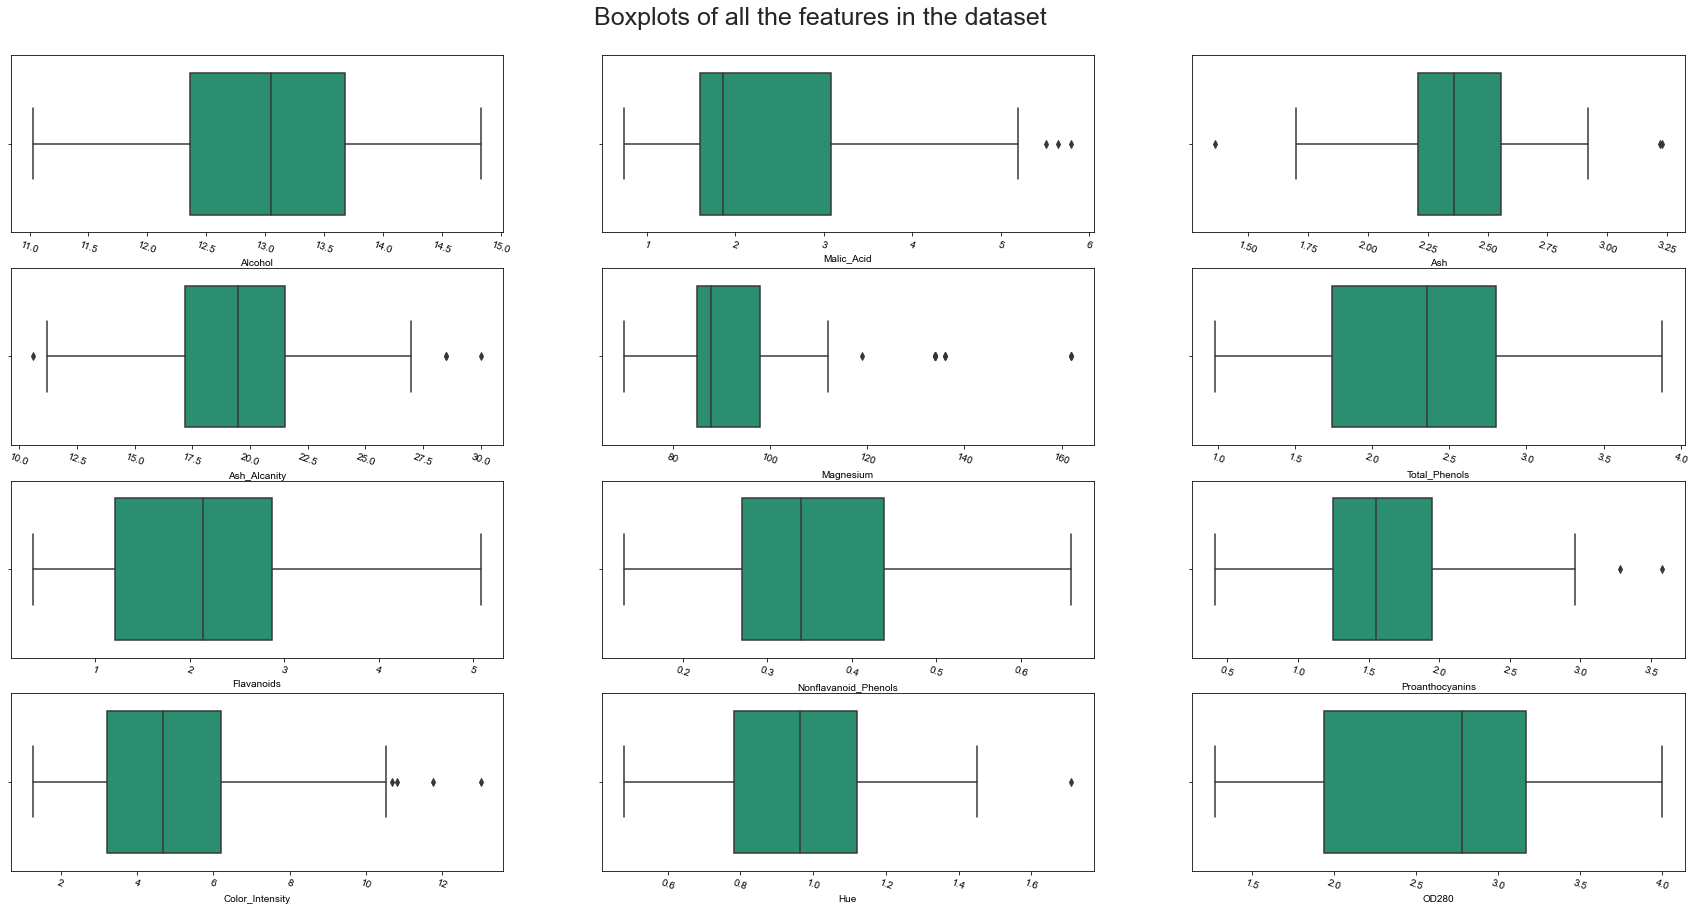

In [6]:
# select the columns to be plotted
cols = data_df.columns.to_list()
# create the figure and axes
fig, axes = plt.subplots(4, 3, figsize=(30, 15))
# Setting the sns plot theme
sns.set_theme(style="whitegrid", palette="Dark2")
# Giving a plot title
fig.suptitle('Boxplots of all the features in the dataset', fontsize=25, y=0.925)
# For making indexing easier, creating a contiguous flattened array
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.boxplot(data=data_df[col], x=data_df[col], ax=ax)
    ax.tick_params(axis='x', rotation=340)

plt.show()

### Removing outliers

In [7]:
for i in cols:
  Q1=np.percentile(data_df[i],25,interpolation='midpoint')
  Q2=np.percentile(data_df[i],50,interpolation='midpoint')
  Q3=np.percentile(data_df[i],75,interpolation='midpoint')
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  data_df.loc[data_df[i]<lower_limit, i] = lower_limit
  data_df.loc[data_df[i]>upper_limit, i] = upper_limit


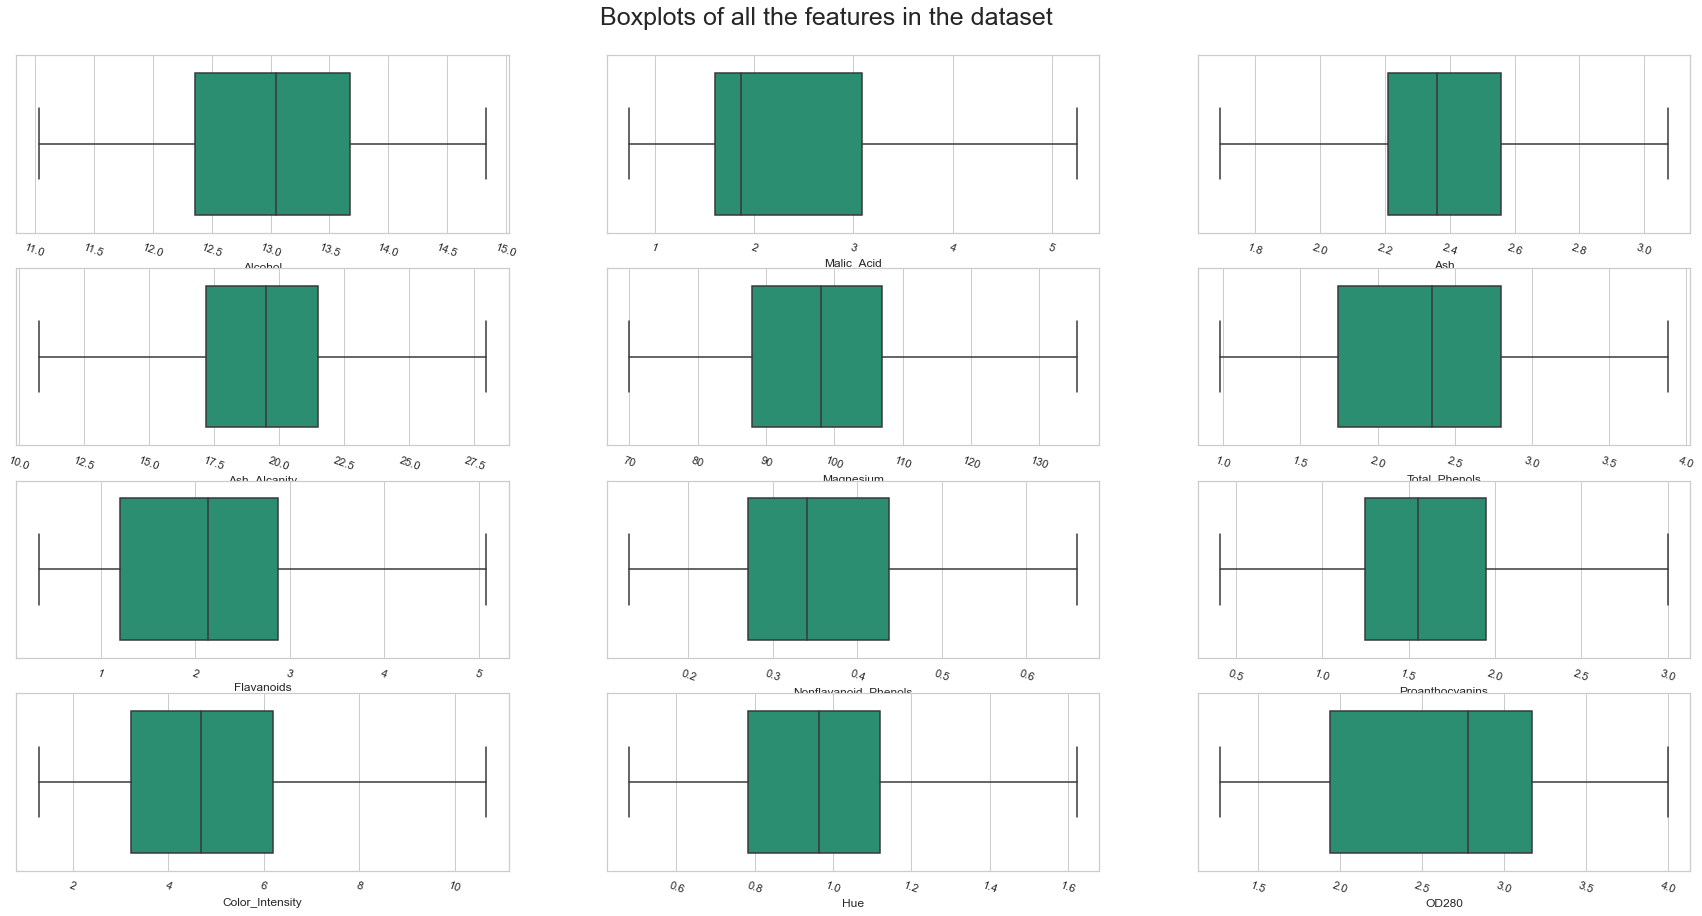

In [8]:
# select the columns to be plotted
cols = data_df.columns.to_list()
# create the figure and axes
fig, axes = plt.subplots(4, 3, figsize=(30, 15))
# Setting the sns plot theme
sns.set_theme(style="whitegrid", palette="Dark2")
# Giving a plot title
fig.suptitle('Boxplots of all the features in the dataset', fontsize=25, y=0.925)
# For making indexing easier, creating a contiguous flattened array
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.boxplot(data=data_df[col], x=data_df[col], ax=ax)
    ax.tick_params(axis='x', rotation=340)

plt.show()


In [9]:
data_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.329635,2.366671,19.478090,99.483146,2.295112,2.029270,0.361854,1.586067,5.037809,0.956958,2.611685,746.893258
std,0.811827,1.098013,0.263461,3.287757,13.414186,0.625851,0.998859,0.124453,0.558153,2.260037,0.227033,0.709990,314.907474
min,11.030000,0.740000,1.692500,10.750000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.255000,3.072500,27.950000,135.500000,3.880000,5.080000,0.660000,3.000000,10.655000,1.622500,4.000000,1680.000000


##### Data Analysis

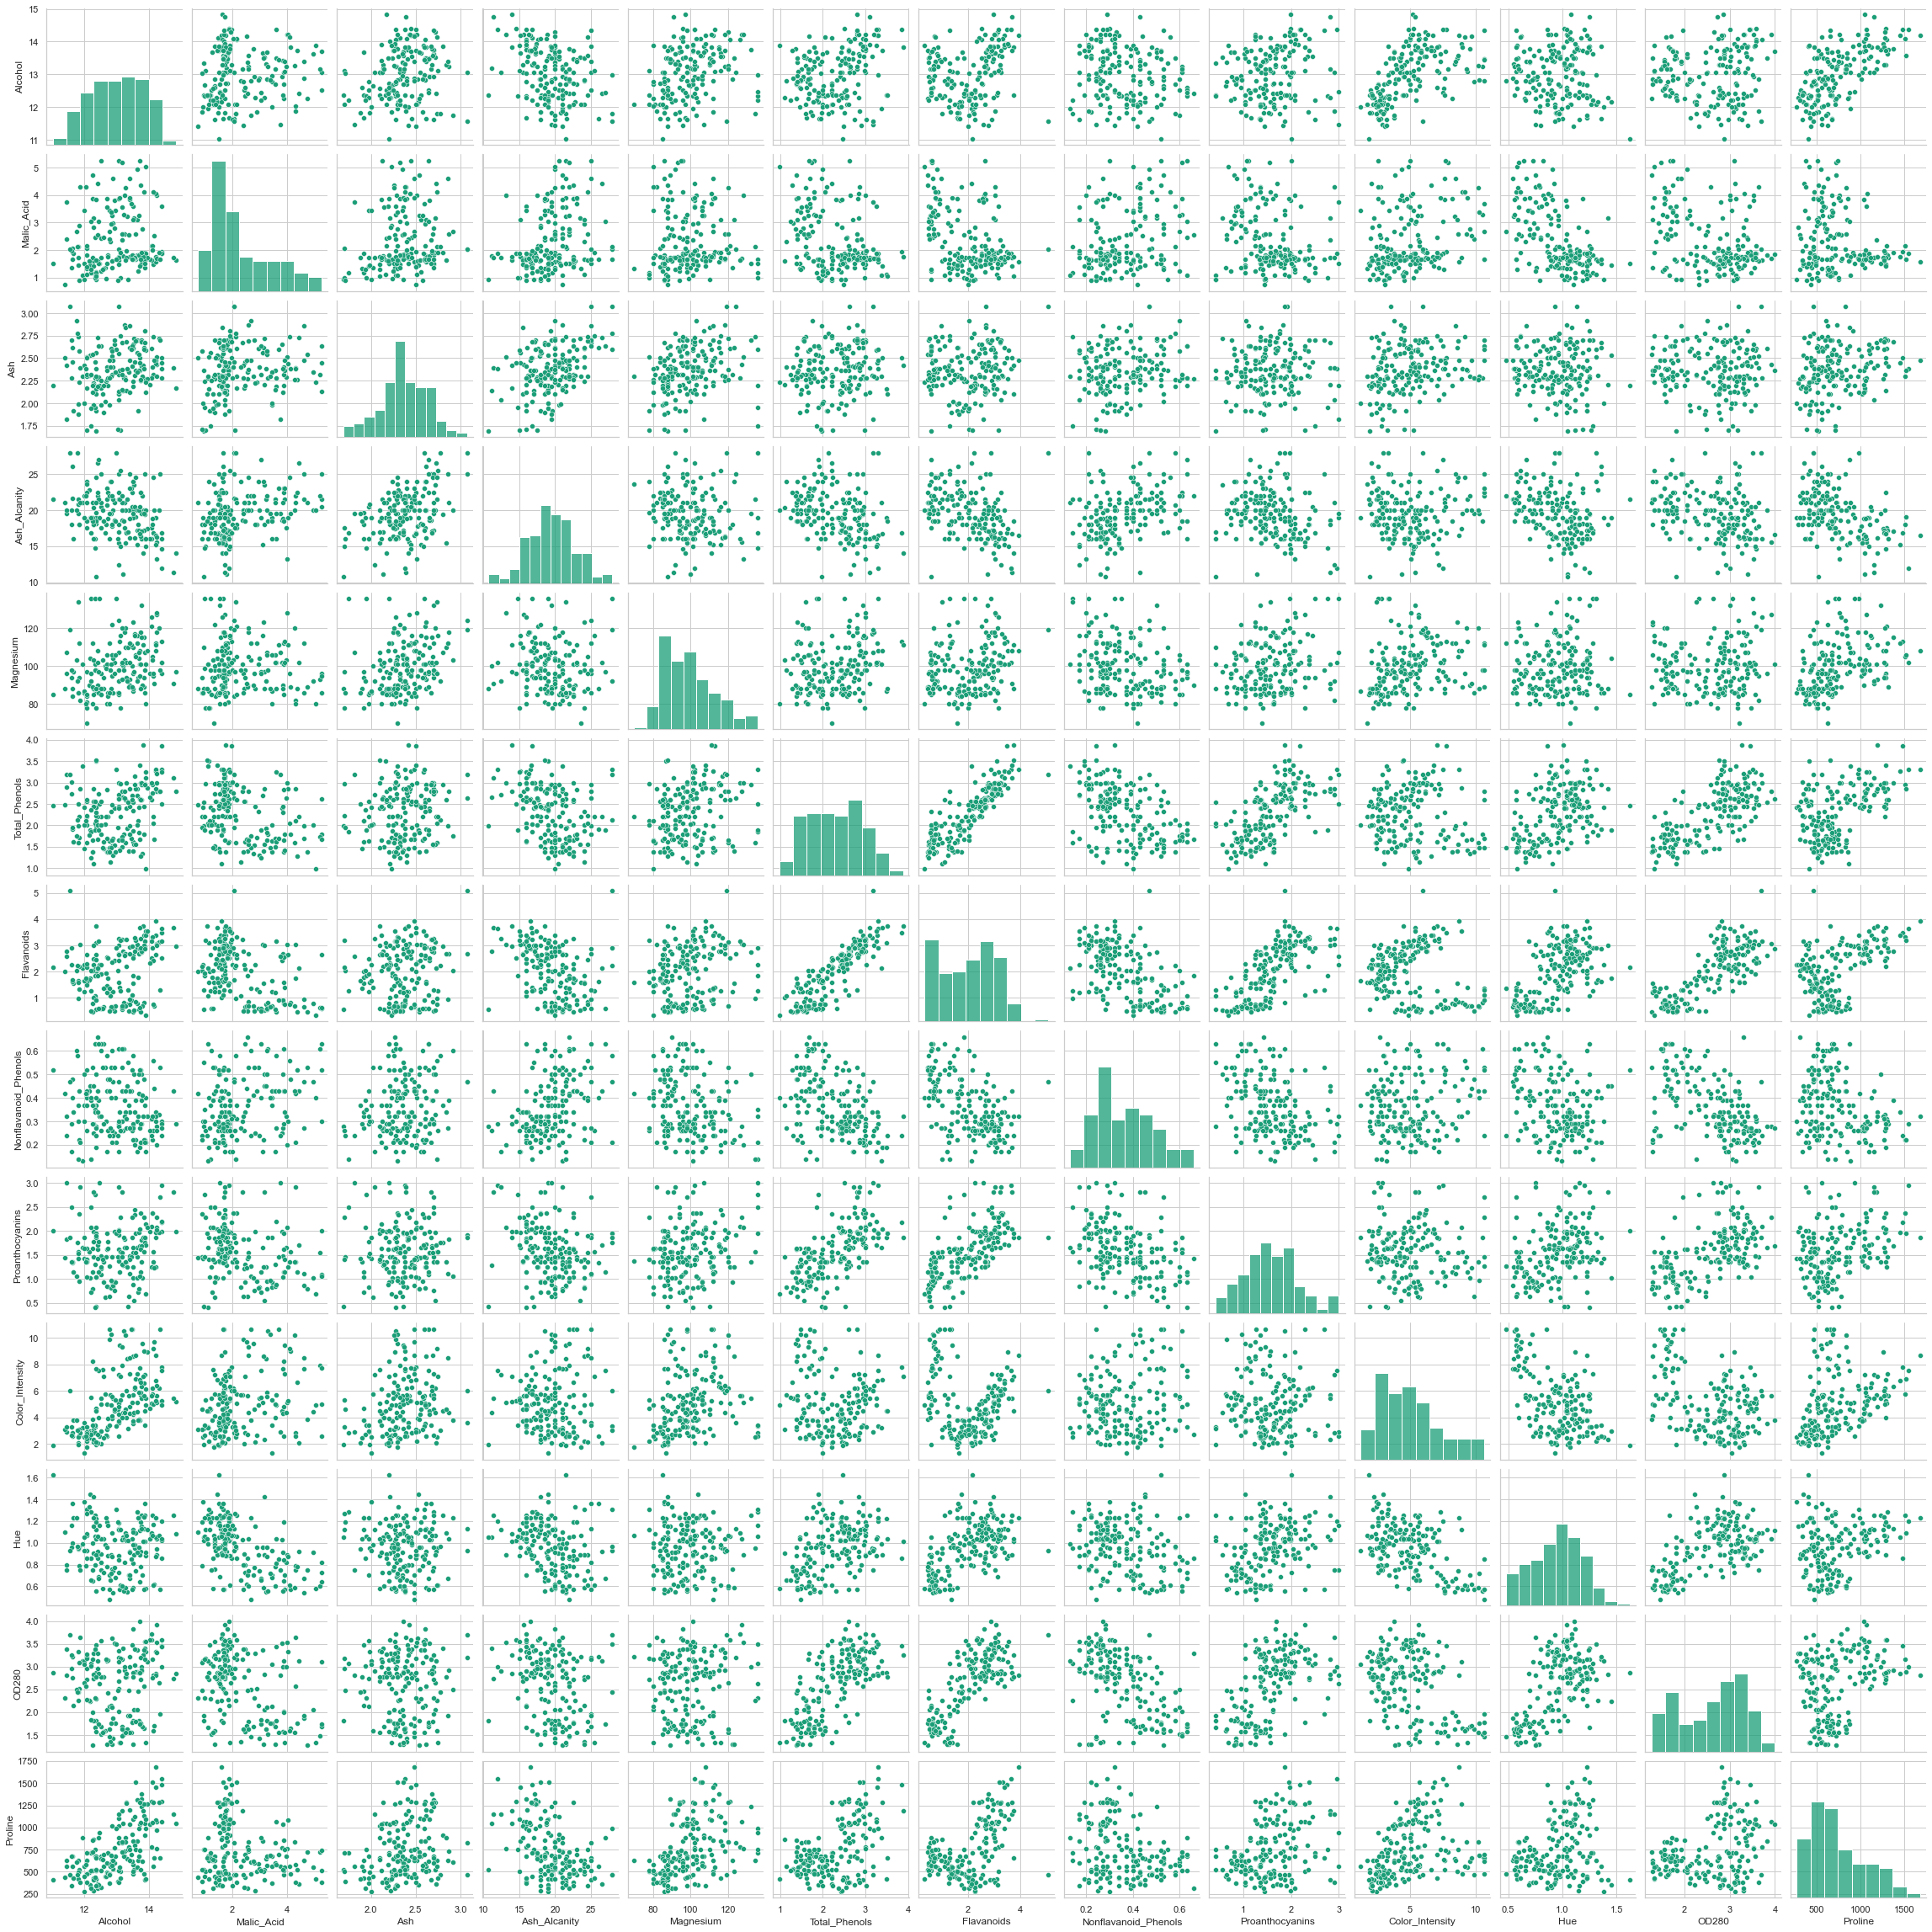

In [10]:
# Pair plot of each attribute.
sns.pairplot(data_df)

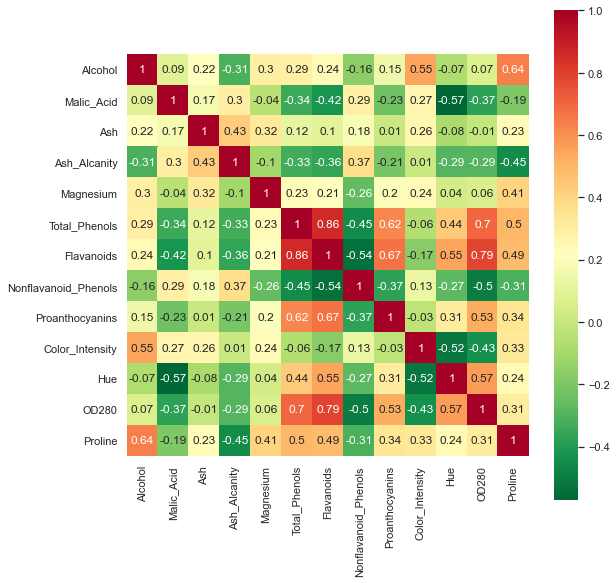

In [11]:
# Correlation Heatmap
correlation = data_df.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2), 
            annot = True, 
            vmax = 1, 
            square = True, 
            cmap = 'RdYlGn_r')
plt.show()

> ***Insights:-***
From the heatmap above, we can conclude that the correlation between

* "Flavanoids" and "Total phenols" (0.86);
* "OD280" and "Flavanoids" (0.79);
* "OD280" and "Total phenols" (0.7);
are large.

### Scaling the data:

In [12]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()
# Scale these variables using 'fit_transform'
data_df1= scaler.fit_transform(data_df)

In [13]:
data_df1 = pd.DataFrame(data_df1)
data_df1.columns = ['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']
data_df1.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
16,1.605081,-0.374122,1.344889,0.159191,1.533804,0.808997,1.115136,-0.256673,0.689803,0.515686,0.499315,0.054117,1.697675
64,-1.026033,-0.803375,0.621684,-0.145825,0.337672,-0.649124,-0.280377,0.710264,-0.999074,-0.926400,2.177803,-0.539109,-1.247982
164,0.962743,0.393055,-0.253774,0.769225,-0.708943,-1.514383,-1.354622,0.387952,-0.999074,2.015455,-1.135002,-1.315952,-0.420013
87,-1.668371,-0.602448,0.964255,1.989292,-0.858460,-0.601054,-0.420933,0.307374,-0.442104,-1.081702,1.780267,0.845085,-0.588791
102,-0.816038,0.109930,0.355240,0.464208,-0.110877,0.424438,0.081051,-0.176095,-0.496004,-0.992958,-0.693294,1.085200,-0.983669
96,-1.470729,-0.191461,1.421015,0.616716,2.580419,-1.113800,-1.043392,-1.787656,-0.046835,-1.126073,-0.030733,-0.496736,-0.388168
150,0.616869,0.721844,0.964255,1.379258,1.758078,-1.434267,-0.461091,-1.143031,-0.603805,1.580611,-1.620880,-1.852681,-0.786230
80,-1.236028,-1.287426,-1.395675,-0.145825,-1.007976,0.200111,0.231646,-0.498407,-0.280403,-1.126073,1.868608,0.717965,-1.493188
173,0.876275,2.671750,0.317177,0.311700,-0.335152,-0.985614,-1.424900,1.274310,-0.945173,1.181264,-1.400026,-1.231206,-0.021952
176,0.209232,0.237793,0.012670,0.159191,1.533804,-1.033684,-1.354622,1.354888,-0.226502,1.891214,-1.576709,-1.400699,0.296498


### Kmeans Clustering plot for Wine dataset

C:\Users\chinchu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


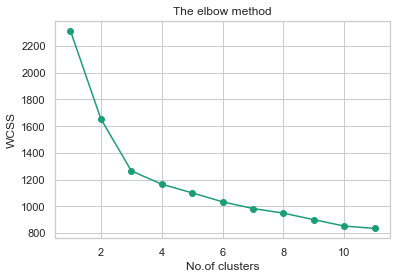

In [14]:
from sklearn.cluster import KMeans
ks= range(1,12)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(data_df1)
    inertia.append(model.inertia_)
plt.plot(ks,inertia,'-o')
plt.title('The elbow method')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.show() 

> ***Insights:-***
* From the figure above, we can see that when the number of cluster is 3, it's hard to tell whether adding another cluster can improve much better the inertia or not

#### Kmeans with K= 3

In [15]:
from sklearn.cluster import KMeans
model_clus3 =KMeans(n_clusters=3, init='k-means++', random_state=50)
kmeans = model_clus3.fit_predict(data_df1)

In [16]:
data_df2 = data_df1.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values
kmeans = model_clus3.fit(data_df2)
pred_kmeans = kmeans.labels_
pred_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [17]:
final_df = pd.concat([data_df, pd.Series(pred_kmeans)], axis = 1)
final_df.columns = ['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline','clusters']
final_df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters
97,12.29,1.410,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0,2
3,14.37,1.950,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
164,13.78,2.760,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,1
137,12.53,5.255,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0,1
48,14.10,2.020,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0,0
38,13.07,1.500,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0
7,14.06,2.150,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
167,12.82,3.370,2.30,19.5,88.0,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685.0,1
147,12.87,4.610,2.48,21.5,86.0,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625.0,1
135,12.60,2.460,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695.0,1


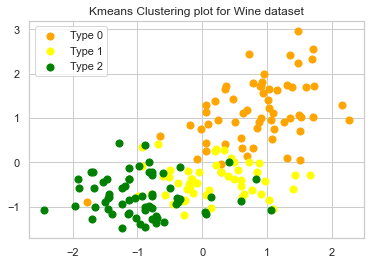

In [22]:
# Visualizing Output
# In the above output we got value labels: ‘0’, ‘1’  and ‘2’. For a better understanding, we can visualize these clusters.

plt.scatter(data_df2[pred_kmeans == 0, 0], data_df2[pred_kmeans == 0, 12], s = 50, c = 'orange', label = 'Type 0')
plt.scatter(data_df2[pred_kmeans == 1, 0], data_df2[pred_kmeans == 1, 12], s = 50, c = 'yellow', label = 'Type 1')
plt.scatter(data_df2[pred_kmeans == 2, 0], data_df2[pred_kmeans == 2, 12], s = 50, c = 'green', label = 'Type 2')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend()

### Hierarchical Dendrogram plot for Wine dataset

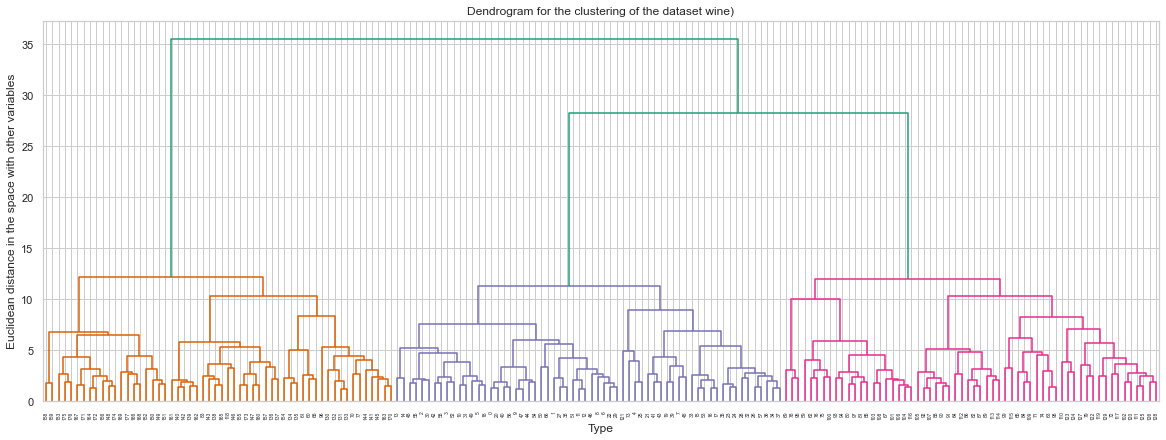

In [19]:
# Plotting of Dendrogram

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,7))
dendrogram=sch.dendrogram(sch.linkage(data_df2,method='ward'))
plt.title('Dendrogram for the clustering of the dataset wine)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')
plt.show()

In [23]:
# Building an Agglomerative Clustering Model

#Initialise Model

from sklearn.cluster import AgglomerativeClustering
cluster_H = AgglomerativeClustering(n_clusters=3)
# Modelling the data
model_clt = cluster_H.fit(data_df2)
model_clt
pred1 = model_clt.labels_
pred1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

#### Hierarchical cluster plot for Wine dataset

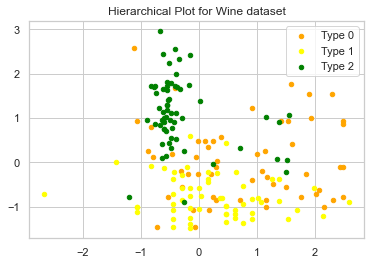

In [24]:
# Plotting the HCA Cluster

plt.scatter(data_df2[pred1 == 0, 9], data_df2[pred1 == 0, 4], s = 20, c = 'orange', label = 'Type 0')
plt.scatter(data_df2[pred1 == 1, 3], data_df2[pred1 == 1, 12], s = 20, c = 'yellow', label = 'Type 1')
plt.scatter(data_df2[pred1 == 2, 1], data_df2[pred1 == 2, 12], s = 20, c = 'green', label = 'Type 2')
plt.title('Hierarchical Plot for Wine dataset')
plt.legend()

### Principal Component Analysis(PCA) 

In [25]:
#Importing the PCA module
from sklearn.decomposition import PCA

pca = PCA(random_state=50)
pca.fit(data_df1)
winenorm_pca_array = pca.transform(data_df1)
winenorm_pca = pd.DataFrame(winenorm_pca_array)
print("Heads of wine_pca:",winenorm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:\n",var_ratio)
sv = pca.singular_values_
print("Singular Value:\n",sv)

Heads of wine_pca:          0         1         2         3         4         5         6   \
0  3.358011 -1.520821 -0.125894 -0.223150  0.711751 -0.173845  0.701561   
1  2.229443  0.332889 -2.043273 -0.366962 -0.106002 -0.984810  0.051000   
2  2.539566 -1.038150  1.019654  0.766796 -0.365012  0.536669  0.411435   
3  3.780555 -2.783620 -0.148536  0.593073 -0.274612  0.131562 -0.395064   
4  1.016268 -0.956354  2.114551 -0.431037  0.358137 -0.385894  0.488231   

         7         8         9         10        11        12  
0  0.018477  0.689945 -1.029101 -0.362774  0.599762 -0.108685  
1  0.991049 -0.379133 -0.209955 -0.118994  0.371921  0.003934  
2 -0.464974 -1.165923 -0.136432 -0.288351  0.048019  0.042740  
3  0.695611  0.003392 -0.244265  0.686321 -0.320572 -0.380837  
4  0.377572  0.281166  0.039075 -0.579449 -0.163915 -0.049809  
Explained variance ratio:
 [0.36478933 0.19614288 0.10905053 0.07061606 0.06297314 0.04813664
 0.0403027  0.02744235 0.0223368  0.01930177 0.01756

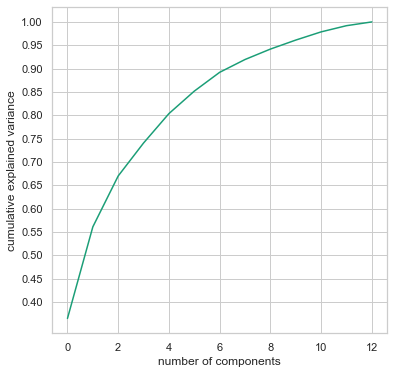

In [26]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.yticks(np.arange(0.4,1.05,0.05))
plt.show()

In [27]:
#Using incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)
df_final1 = pca_final.fit_transform(data_df1)

<AxesSubplot:>

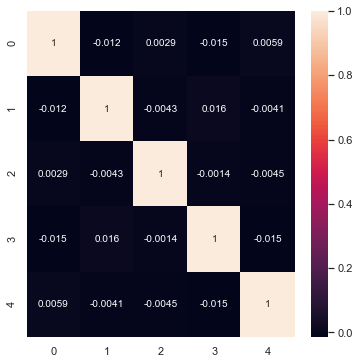

In [28]:
corrmat = np.corrcoef(df_final1.transpose())
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (6,6))
sns.heatmap(corrmat,annot = True)

In [29]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.015895026068324804 , min corr:  -0.015012884643789075


> ***Insights:-***
* From above best model is PCA.